<a href="https://colab.research.google.com/github/TheoLam00/TheoLam00.github.io/blob/main/project/unem/unem%26swing%26voteRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import requests

In [41]:
unem = pd.read_csv('https://raw.githubusercontent.com/TheoLam00/TheoLam00.github.io/refs/heads/main/project/unem/Fred-Unemployment.csv')
vote = pd.read_csv('https://raw.githubusercontent.com/TheoLam00/TheoLam00.github.io/refs/heads/main/project/voteRate/voteRatesCleaned.csv')

In [42]:
#calculate average value of unem by 6 month
unem = unem.sort_values(by=['state', 'date'])
unem['6-Month_Avg'] = unem.groupby('state')['value'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())
unem['3-Month_Avg'] = unem.groupby('state')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
unem['year_Avg'] = unem.groupby('state')['value'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

In [43]:
vote['year'] = vote['year'].astype(str)
vote['date'] = vote['year'] + "-11-01"
vote = vote[['state','date','voteRate','swingIndex']]

In [44]:
#combine vote to unem
unem = unem.merge(vote, on=['state','date'])
unem = unem.dropna()

In [46]:
#plot each state by pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


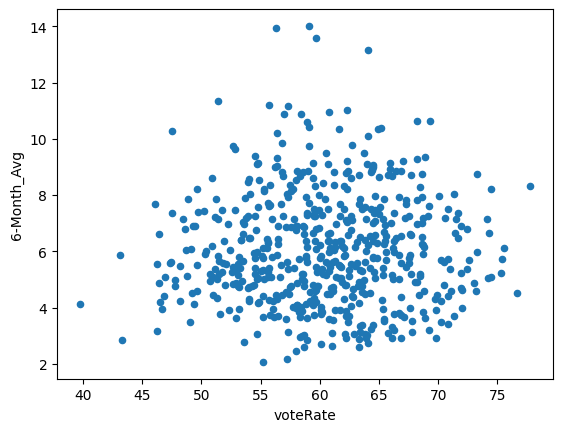

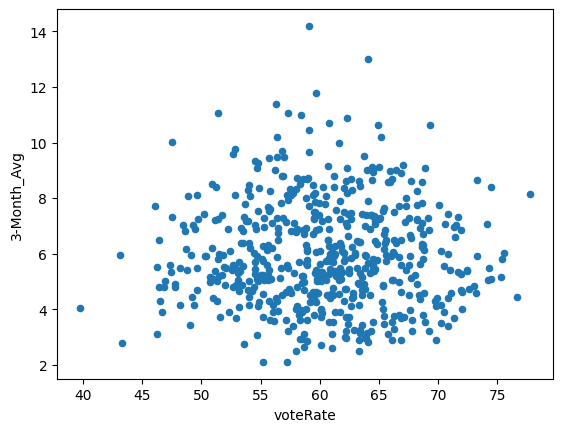

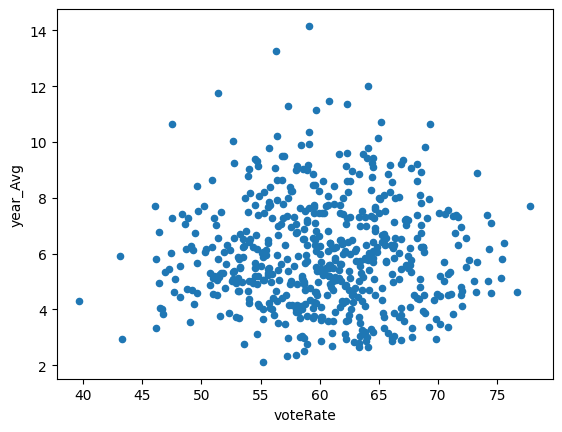

In [47]:
unem.plot(x='voteRate',y='6-Month_Avg',kind='scatter')
plt.show()
unem.plot(x='voteRate',y='3-Month_Avg',kind='scatter')
plt.show()
unem.plot(x='voteRate',y='year_Avg',kind='scatter')
plt.show()

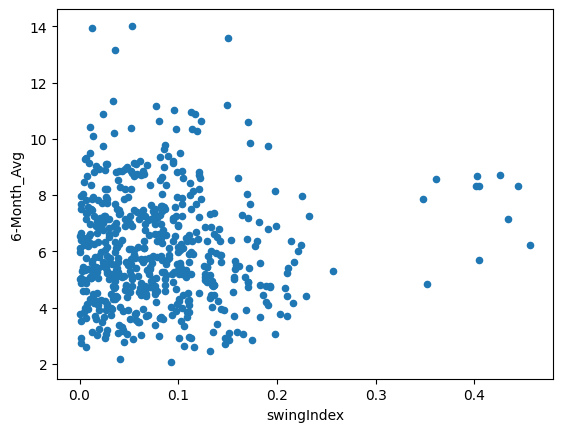

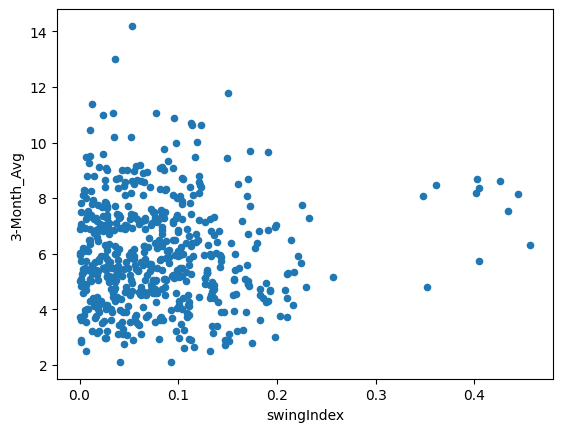

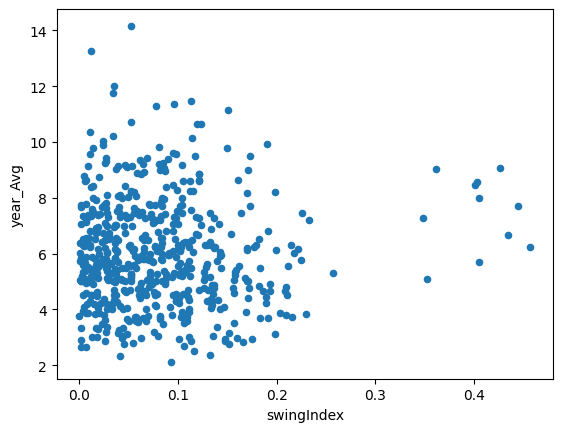

In [48]:
unem.plot(x='swingIndex',y='6-Month_Avg',kind='scatter')
plt.show()
unem.plot(x='swingIndex',y='3-Month_Avg',kind='scatter')
plt.show()
unem.plot(x='swingIndex',y='year_Avg',kind='scatter')
plt.show()